# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import elvis_api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [12]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
# OpenWeatherMap API Key
key = elvis_api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + key

query_url = url + '&q='

cityweather = []
lat = []
temp = []
windspeed = []
cloudiness = []
humidity = [] 
id_city = []


# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp_max'])
        windspeed.append(response['wind']['speed'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        id_city.append(response['id'])
        cityweather.append(city)
        print(f"The city being processed is: {city} | {response['id']}")
    except:
        pass      
     


The city being processed is: yumen | 1528998
The city being processed is: narsaq | 3421719
The city being processed is: stribro | 3064919
The city being processed is: scarborough | 2638419
The city being processed is: new norfolk | 2155415
The city being processed is: hofn | 2630299
The city being processed is: rocha | 3440777
The city being processed is: jamestown | 2069194
The city being processed is: butaritari | 2110227
The city being processed is: zatoka | 775758
The city being processed is: cheltenham | 2653261
The city being processed is: port hardy | 6111862
The city being processed is: qasigiannguit | 3420768
The city being processed is: rikitea | 4030556
The city being processed is: vaini | 1273574
The city being processed is: yarada | 1252783
The city being processed is: tema | 2294700
The city being processed is: atuona | 4020109
The city being processed is: chokurdakh | 2126123
The city being processed is: oume | 2282827
The city being processed is: dolores | 3442750
The c

The city being processed is: ribeira grande | 3372707
The city being processed is: clyde river | 5924351
The city being processed is: nakusp | 6085665
The city being processed is: lethem | 3379316
The city being processed is: riverton | 5836665
The city being processed is: deputatskiy | 2028164
The city being processed is: talnakh | 1490256
The city being processed is: palu | 1633034
The city being processed is: purna | 1259177
The city being processed is: bandarban | 1185270
The city being processed is: yellowknife | 6185377
The city being processed is: geraldton | 5960603
The city being processed is: klaksvik | 2618795
The city being processed is: chimore | 3920736
The city being processed is: yakeshi | 2033536
The city being processed is: severo-kurilsk | 2121385
The city being processed is: ashqelon | 295620
The city being processed is: sarankhola | 1185239
The city being processed is: nouadhibou | 2377457
The city being processed is: inongo | 2315417
The city being processed is: m

The city being processed is: pedregulho | 3454408
The city being processed is: gorontalo | 1643837
The city being processed is: breytovo | 571634
The city being processed is: berlevag | 780687
The city being processed is: eregli | 315498
The city being processed is: torbat-e jam | 1159362
The city being processed is: sabha | 2212775
The city being processed is: tateyama | 1849876
The city being processed is: san miguel | 3430545
The city being processed is: rawicz | 3087307
The city being processed is: suntar | 2015913
The city being processed is: tak bai | 1605957
The city being processed is: zabaykalsk | 2012780
The city being processed is: baoro | 2389804
The city being processed is: maiduguri | 2331447
The city being processed is: sao filipe | 3374210
The city being processed is: beloretsk | 515267
The city being processed is: nassogne | 2790451
The city being processed is: necochea | 3430443
The city being processed is: tandil | 3427833
The city being processed is: aripuana | 3665

The city being processed is: gornyak | 1506260
The city being processed is: cuamba | 1047660
The city being processed is: pavilosta | 456827
The city being processed is: morondava | 1058381
The city being processed is: blagoyevo | 576093
The city being processed is: yuzhno-kurilsk | 2119447
The city being processed is: ulladulla | 2145554
The city being processed is: vinkovci | 3187719
The city being processed is: ankazoabo | 1072879
The city being processed is: lerwick | 2644605
The city being processed is: dingli | 1259693
The city being processed is: aketi | 220448
The city being processed is: pedasi | 3703239
The city being processed is: smithers | 6149996
The city being processed is: los llanos de aridane | 2514651
The city being processed is: redlands | 5386754
The city being processed is: bichura | 2026708
The city being processed is: chapleau | 5919915
The city being processed is: general roca | 3855065
The city being processed is: maltrata | 3523670
The city being processed is

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
weather_dict = {
    "city": cityweather,
    "lat": lat,
    "temp_max": temp,
    "windspeed": windspeed,
    "cloudiness": cloudiness,
    "humidity": humidity 
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city,lat,temp_max,windspeed,cloudiness,humidity
0,yumen,40.29,42.51,7.78,100,39
1,narsaq,60.91,41.00,12.75,75,52
2,stribro,49.75,43.00,2.24,94,100
3,scarborough,54.28,45.00,10.29,80,100
4,new norfolk,-42.78,52.00,10.29,20,57


In [15]:
# Print the city count to confirm sufficient count
weather_data.count()

city          551
lat           551
temp_max      551
windspeed     551
cloudiness    551
humidity      551
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

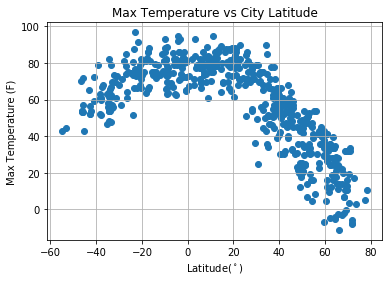

In [16]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["temp_max"], marker="o")

# Incorporate the other graph properties
plt.title("Max Temperature vs City Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlabel(r"Latitude($^\circ$)")
plt.grid(True)

# Save the figure
plt.savefig("../Images/Temperature_Latitude_Plot.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

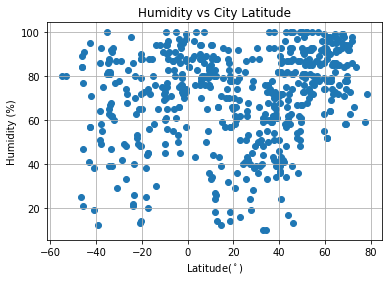

In [17]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity vs City Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel(r"Latitude($^\circ$)")
plt.grid(True)

# Save the figure
plt.savefig("../Images/Humidity_Latitude_Plot.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

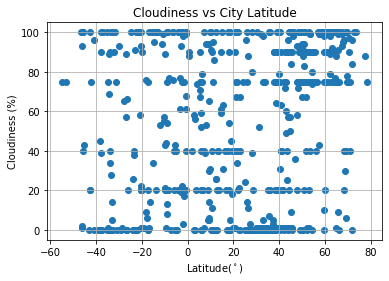

In [18]:

# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness vs City Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel(r"Latitude($^\circ$)")
plt.grid(True)

# Save the figure
plt.savefig("../Images/Cloudiness_Latitude_Plot.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

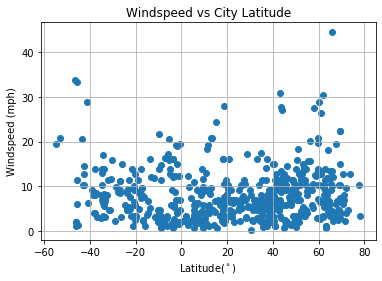

In [19]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["windspeed"], marker="o")

# Incorporate the other graph properties
plt.title("Windspeed vs City Latitude")
plt.ylabel("Windspeed (mph)")
plt.xlabel(r"Latitude($^\circ$)")
plt.grid(True)

# Save the figure
plt.savefig("../Images/Windspeed_Latitude_Plot.png")

# Show plot
plt.show()

In [20]:
weather_data.to_csv('elvis_WeatherPy_.csv')